In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [4]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization. log indicates logistic regression
logistic = SGDClassifier(loss='log', penalty='l2',
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [12]:
pipe

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=1e-05, verbose=0, warm_start=False))])

In [6]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best parameter (CV score=0.925):
{'logistic__alpha': 0.01, 'pca__n_components': 64}


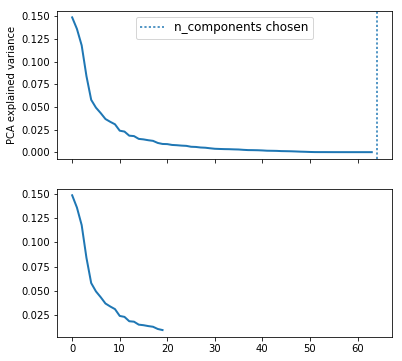

In [22]:
# Plot the PCA spectrum

pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

pca2 = PCA(n_components=20)
pca2.fit(X_digits)
ax1.plot(pca2.explained_variance_ratio_ ,linewidth=2)
plt.show()

In [17]:
pca.n_components_

64

In [13]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [23]:
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [25]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,param_logistic__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.043691,0.000893,0.759731,0.0001,5,"{'logistic__alpha': 0.0001, 'pca__n_components...",17,0.804945,0.638122,0.793872,0.795518,0.766197,0.033952,0.000297,0.062163
1,0.037418,0.000808,0.874397,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",15,0.881868,0.792818,0.896936,0.935574,0.864789,0.005459,0.000024,0.047019
2,0.067438,0.001743,0.909378,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",11,0.914835,0.856354,0.933148,0.946779,0.895775,0.024070,0.001800,0.031592
3,0.178056,0.000955,0.909338,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",12,0.928571,0.848066,0.941504,0.932773,0.895775,0.166931,0.000138,0.034328
4,0.059407,0.000865,0.921019,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",2,0.917582,0.892265,0.938719,0.966387,0.890141,0.002751,0.000149,0.028857
5,0.054160,0.001185,0.907130,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",13,0.920330,0.839779,0.941504,0.957983,0.876056,0.005009,0.000413,0.043459
6,0.391402,0.000836,0.784813,0.01,5,"{'logistic__alpha': 0.01, 'pca__n_components': 5}",16,0.760989,0.748619,0.802228,0.829132,0.783099,0.721606,0.000187,0.028803
7,0.046032,0.000764,0.912014,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",10,0.947802,0.870166,0.919220,0.938375,0.884507,0.015506,0.000063,0.030118
8,0.045193,0.000795,0.913751,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",9,0.923077,0.881215,0.927577,0.952381,0.884507,0.003197,0.000033,0.027145
9,0.053213,0.001053,0.920455,0.01,40,"{'logistic__alpha': 0.01, 'pca__n_components':...",3,0.920330,0.889503,0.938719,0.963585,0.890141,0.003554,0.000559,0.028533


In [26]:
# For each number of components, find the best classifier results

components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [27]:
best_clfs

,,mean_fit_time,mean_score_time,mean_test_score,param_logistic__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
5,6,0.391402,0.000836,0.784813,0.01,5,"{'logistic__alpha': 0.01, 'pca__n_components': 5}",16,0.760989,0.748619,0.802228,0.829132,0.783099,0.721606,0.000187,0.028803
20,7,0.046032,0.000764,0.912014,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",10,0.947802,0.870166,0.919220,0.938375,0.884507,0.015506,0.000063,0.030118
30,14,0.108064,0.000900,0.915907,1,30,"{'logistic__alpha': 1.0, 'pca__n_components': 30}",8,0.934066,0.889503,0.930362,0.955182,0.870423,0.026518,0.000066,0.031136
40,9,0.053213,0.001053,0.920455,0.01,40,"{'logistic__alpha': 0.01, 'pca__n_components':...",3,0.920330,0.889503,0.938719,0.963585,0.890141,0.003554,0.000559,0.028533
50,4,0.059407,0.000865,0.921019,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",2,0.917582,0.892265,0.938719,0.966387,0.890141,0.002751,0.000149,0.028857
64,11,0.050972,0.000870,0.925479,0.01,64,"{'logistic__alpha': 0.01, 'pca__n_components':...",1,0.931319,0.883978,0.941504,0.969188,0.901408,0.003111,0.000085,0.030010


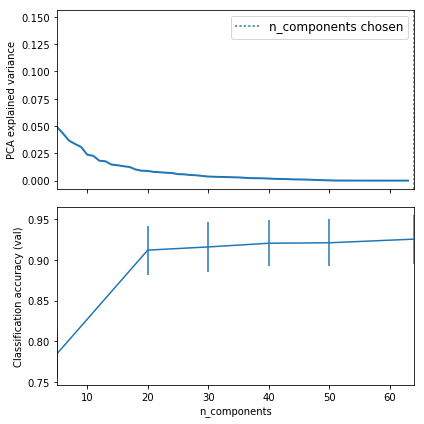

In [28]:
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

In [29]:
search.predict(X_digits)

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
search.score(X_digits, y_digits)

0.9788536449638287

In [30]:
search.predict_proba(X_digits)

array([[1.00000000e+00, 1.24929714e-81, 2.71167713e-47, ...,
        1.78321973e-36, 1.00808945e-66, 2.05969661e-25],
       [1.56598080e-79, 1.00000000e+00, 1.24587013e-37, ...,
        4.09369619e-43, 1.22150879e-22, 4.97978712e-54],
       [3.89448122e-51, 1.47777602e-01, 8.52222398e-01, ...,
        1.83978876e-46, 7.24712063e-12, 1.31871954e-64],
       ...,
       [1.71266376e-52, 9.41951919e-18, 2.28753664e-41, ...,
        2.51319616e-53, 1.00000000e+00, 3.52940049e-56],
       [2.79146574e-23, 1.98950584e-36, 1.43625727e-53, ...,
        4.33622998e-51, 2.89414270e-17, 1.00000000e+00],
       [2.81988319e-49, 3.53281951e-35, 5.78841093e-45, ...,
        2.44680608e-71, 1.00000000e+00, 9.72367595e-36]])

In [36]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [43]:
# use random search CV

In [39]:
param_dist = {
    'pca__n_components': np.arange(5, 60),
    'logistic__alpha': np.logspace(-4, 4, 50),
}

n_iter_search = 20
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_digits, y_digits)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 18.43 seconds for 20 candidates parameter settings.


In [40]:
random_search.predict(X_digits) 

array([0, 1, 2, ..., 8, 9, 8])

In [41]:
random_search.score(X_digits, y_digits)

0.9638286032276016

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA


pipe = Pipeline([
    ('reduce_dim', PCA(whiten=True)),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8, 10, 12]
C_OPTIONS = [0.8, 0.9, 1, 10, 50, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    }
]

# if no scoring is defined, it will use the default scorer of estimator.
grid = GridSearchCV(pipe, cv=10, n_jobs=1, param_grid=param_grid)

grid.fit(X_train, y_train)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2



In [31]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)

In [32]:

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, y)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 7.56 seconds for 20 candidates parameter settings.


In [33]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=7,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [35]:
pd.DataFrame(random_search.cv_results_)

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.058432,0.003436,0.898164,1.000000,True,entropy,None,1,2,"{'bootstrap': True, 'criterion': 'entropy', 'm...",...,0.899721,1.000000,0.932773,1.000000,0.887324,1.000000,0.012482,0.000431,0.019098,0.000000
1,0.039845,0.003094,0.791875,0.862966,False,gini,3,3,6,"{'bootstrap': False, 'criterion': 'gini', 'max...",...,0.788301,0.868567,0.845938,0.854861,0.788732,0.866158,0.002520,0.000667,0.035536,0.004637
2,0.035993,0.003299,0.775181,0.830147,True,gini,3,1,7,"{'bootstrap': True, 'criterion': 'gini', 'max_...",...,0.729805,0.812935,0.817927,0.779167,0.771831,0.861304,0.000686,0.000438,0.031837,0.031454
3,0.054868,0.003887,0.913745,0.997635,True,entropy,None,2,7,"{'bootstrap': True, 'criterion': 'entropy', 'm...",...,0.913649,0.997218,0.963585,0.998611,0.895775,0.997226,0.002154,0.000642,0.028481,0.001214
4,0.032644,0.002815,0.751809,0.824874,True,entropy,3,1,3,"{'bootstrap': True, 'criterion': 'entropy', 'm...",...,0.740947,0.799026,0.798319,0.827778,0.712676,0.811373,0.002902,0.000437,0.029941,0.017472
5,0.046893,0.002777,0.791319,0.864623,True,entropy,3,6,8,"{'bootstrap': True, 'criterion': 'entropy', 'm...",...,0.824513,0.885953,0.837535,0.863194,0.763380,0.864771,0.007284,0.000461,0.037176,0.012396
6,0.067934,0.003442,0.924318,1.000000,False,entropy,None,2,2,"{'bootstrap': False, 'criterion': 'entropy', '...",...,0.941504,1.000000,0.971989,1.000000,0.921127,1.000000,0.002658,0.000251,0.030417,0.000000
7,0.099584,0.002994,0.936004,1.000000,False,entropy,None,7,2,"{'bootstrap': False, 'criterion': 'entropy', '...",...,0.944290,1.000000,0.955182,1.000000,0.926761,1.000000,0.009588,0.000063,0.012430,0.000000
8,0.094693,0.003507,0.930996,1.000000,False,entropy,None,6,9,"{'bootstrap': False, 'criterion': 'entropy', '...",...,0.941504,1.000000,0.943978,1.000000,0.909859,1.000000,0.000586,0.000396,0.014438,0.000000
9,0.106853,0.004094,0.930440,1.000000,False,entropy,None,8,8,"{'bootstrap': False, 'criterion': 'entropy', '...",...,0.944290,1.000000,0.957983,1.000000,0.935211,1.000000,0.002095,0.000808,0.024061,0.000000
